In [18]:
import pandas as pd

In [19]:
df_train=pd.read_csv('titanicData.csv')
print(df_train.shape)
df_train.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()
# GK:  boarding ponts:       'Southampton', england      'Cherbourg', france          'Queenstown' (cobh), ireland

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
pd.isnull(df_train['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [9]:
df_train=df_train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [10]:
df_train['Age'].mean()              ,           df_train['Age'].median()

(29.69911764705882, 28.0)

In [11]:
df_train.groupby('Pclass')['Age'].mean()              #this is more precise

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [13]:
def age_approx(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [15]:
df_train['Age']=df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [16]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
df_train.dropna(inplace=True)
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [16]:
#pd.get_dummies(df_train['Sex'])
df_train_dummied=pd.get_dummies(df_train,columns=['Sex'])
df_train_dummied=pd.get_dummies(df_train_dummied,columns=['Embarked'])

df_train_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:>

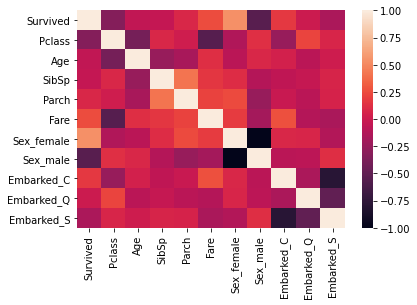

In [18]:
import seaborn as sns

sns.heatmap(df_train_dummied.corr())

***

In [19]:
X=df_train_dummied[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].values
y=df_train_dummied['Survived']

In [20]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression 

In [22]:
logReg=LogisticRegression()

In [23]:
logReg.fit(Xtrain,ytrain)

C:\Users\adity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [24]:
predicted=logReg.predict(Xtest)

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [120]:
confusion_matrix(ytest,predicted)

array([[138,  29],
       [ 25,  75]], dtype=int64)

In [122]:
accuracy_score(ytest,predicted)

0.797752808988764

In [127]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [128]:
logReg.predict_proba(Xtest)

array([[0.9010908 , 0.0989092 ],
       [0.04235771, 0.95764229],
       [0.20789931, 0.79210069],
       [0.75295657, 0.24704343],
       [0.03465074, 0.96534926],
       [0.89657771, 0.10342229],
       [0.70396411, 0.29603589],
       [0.86552156, 0.13447844],
       [0.07774077, 0.92225923],
       [0.03424771, 0.96575229],
       [0.60336183, 0.39663817],
       [0.43614612, 0.56385388],
       [0.96614112, 0.03385888],
       [0.8735928 , 0.1264072 ],
       [0.90542773, 0.09457227],
       [0.9010908 , 0.0989092 ],
       [0.67611442, 0.32388558],
       [0.80634337, 0.19365663],
       [0.73081201, 0.26918799],
       [0.88193119, 0.11806881],
       [0.73087171, 0.26912829],
       [0.08350072, 0.91649928],
       [0.94863355, 0.05136645],
       [0.42146954, 0.57853046],
       [0.88193119, 0.11806881],
       [0.45814179, 0.54185821],
       [0.69590141, 0.30409859],
       [0.14545814, 0.85454186],
       [0.56652319, 0.43347681],
       [0.71420311, 0.28579689],
       [0.

In [131]:
logReg.score(Xtest,ytest)

0.797752808988764